In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: esalathe

Plot a map of WRF data
"""

# Import numpy and pyplot routines

from numpy import (
        linspace,array, log,exp,sin,cos,sqrt, pi,e, 
        zeros, ones, amin,amax, argmax, arange
        )
from matplotlib.pyplot import plot, figure, show

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the map plotting routine. uses the cartopy package.

def WRFplot(plotvar,lats,lons,  vmin,vmax, maptitle,varname, ColMap, smflg=1, domain='auto'):
    from matplotlib.pyplot import colorbar, axes, pcolormesh, colorbar, title

    import numpy as np
    import matplotlib.pyplot as plt

    from matplotlib.cm import get_cmap
    import cartopy
    import cartopy.crs as crs
    from cartopy.feature import NaturalEarthFeature

    # Set the cartopy mapping object for the WRF domain
    #  (Taken from wrf getcartopy and cartopy_xlim)
    cart_proj = cartopy.crs.LambertConformal(
            central_longitude=-121.0, 
            central_latitude=45.665584564208984, 
            false_easting=0.0, 
            false_northing=0.0, 
            standard_parallels=[30.,60.], 
            globe=None, 
            cutoff=-30)
    ax = axes(projection=cart_proj)

    # Set map limits based on domain (ideally use lat-lon and transform...)
    if domain=='pnw02':
        ax.set_xlim([-875806.9669240027, 1056192.549175313])
        ax.set_ylim([-733768.6404772081, 730230.3670079684])
    elif domain=='pnw01':
        ax.set_xlim([-3.7e6, 1.6e6])
        ax.set_ylim([-2.15e6, 2.3e6])
    elif domain=='west02':
        ax.set_xlim([-8.8e5, 1.2e6])
        ax.set_ylim([-1.58e6, 7.3e5])

    # Use field min/max if -999
    if vmin==-999: vmin=plotvar.min()
    if vmax==-999: vmax=plotvar.max()        
    
    # Color in the data on the map with smoothing

    if smflg == 1:
        smooth = 'gouraud'
    else:
        smooth = 'nearest'

    pcolormesh(lons,lats,
                   plotvar,vmin=vmin,vmax=vmax,
                   transform=crs.PlateCarree(),
                   shading=smooth,
                   cmap=colormaps[ColMap]
                   )
    
    # Add a color bar
    cbar=colorbar(ax=ax, shrink=.6)#, orientation='horizontal')
    cbar.set_label(varname)


    # Add contour lines
    # plt.contour(lons,lats,plotvar, vmin=vmin,vmax=vmax, colors='gray', linewidths=0.5, transform=crs.PlateCarree())


    # Download and add the states and coastlines
    states = NaturalEarthFeature(category='cultural', scale='50m',
                             facecolor='none',
                             name='admin_1_states_provinces_lines')
    ax.add_feature(states, linewidth=.5, edgecolor='black')
    borders = NaturalEarthFeature(category='cultural', scale='50m',
                             facecolor='none',
                             name='admin_0_boundary_lines_land')
    ax.add_feature(borders, linewidth=.75, edgecolor='black')
    ax.coastlines('50m', linewidth=0.8)
    

    
    # Add gridlines
    #ax.gridlines(color='black', linestyle='dotted')
    
    # Add a title
    title(maptitle)

Once everything is defined, we can do some tasks with the WRF data. Here we just select one year and plot it

In [3]:
# 1) open netcdf file. Neet to install the netCDF4 module
from netCDF4 import Dataset
ncFile = Dataset("ccsm4-wrf_1970-2099_T2MAX_extr.nc", "r", format="NETCDF4")

Explore the contents of ncFile

In [10]:
# Print all the metadata. This is messy! But contains all the details for the simulation.
ncFile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Fri Feb  5 16:22:30 2021: ncatted -O -a description,T2MAXx,m,c,Annual Maximum Daily T2MAX /home/disk/columbia2/salathe/WRFensemble/AnnualStats/WRF/data/ccsm4-wrf_1970-2099_T2MAX_extr.nc
Fri Feb  5 16:22:30 2021: ncatted -O -a description,T2MAX90,m,c,Annual 90th Percentile Daily T2MAX /home/disk/columbia2/salathe/WRFensemble/AnnualStats/WRF/data/ccsm4-wrf_1970-2099_T2MAX_extr.nc
Fri Feb  5 16:22:30 2021: ncrcat /home/disk/columbia2/salathe/WRFensemble/AnnualStats/WRF/data/ccsm4-wrf_1970_T2MAX90.nc /home/disk/columbia2/salathe/WRFensemble/AnnualStats/WRF/data/ccsm4-wrf_1971_T2MAX90.nc /home/disk/columbia2/salathe/WRFensemble/AnnualStats/WRF/data/ccsm4-wrf_1972_T2MAX90.nc /home/disk/columbia2/salathe/WRFensemble/AnnualStats/WRF/data/ccsm4-wrf_1973_T2MAX90.nc /home/disk/columbia2/salathe/W

In [12]:
# Some metadata describing this WRF run
ncFile.TITLE

' OUTPUT FROM WRF V3.8.1 MODEL'

In [13]:
ncFile.START_DATE

'1970-01-01_00:00:00'

In [7]:
# Dimensions for data arraus
ncFile.dimensions

{'south_north': <class 'netCDF4._netCDF4.Dimension'>: name = 'south_north', size = 123,
 'west_east': <class 'netCDF4._netCDF4.Dimension'>: name = 'west_east', size = 162,
 'XTIME': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'XTIME', size = 130,
 'bnds': <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2}

In [5]:
# List of variables
ncFile.variables

{'XLONG': <class 'netCDF4._netCDF4.Variable'>
 float32 XLONG(south_north, west_east)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     _CoordinateAxisType: Lon
 unlimited dimensions: 
 current shape = (123, 162)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'XLAT': <class 'netCDF4._netCDF4.Variable'>
 float32 XLAT(south_north, west_east)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     _CoordinateAxisType: Lat
 unlimited dimensions: 
 current shape = (123, 162)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'XTIME': <class 'netCDF4._netCDF4.Variable'>
 float64 XTIME(XTIME)
     standard_name: time
     long_name: time
     bounds: XTIME_bnds
     units: days since 1850-1-1 00:00:00
     calendar: 365_day
     axis: T
 unlimited dimensions: XTIME
 current shape = (130,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'XTIME_bnds': <class 'netCDF4._netCDF4.Variable'>

In [6]:
# One particular variable
ncFile.variables["T2MAX90"]

<class 'netCDF4._netCDF4.Variable'>
float32 T2MAX90(XTIME, south_north, west_east)
    units: K
    coordinates: XLAT XLONG
    FieldType: 104
    MemoryOrder: XY 
    description: Annual 90th Percentile Daily T2MAX
    stagger: 
unlimited dimensions: XTIME
current shape = (130, 123, 162)
filling on, default _FillValue of 9.969209968386869e+36 used

In [4]:
# 2) read in the data to plot. Note that the [:] converts the netCDF object to a numpy array.
T90=ncFile.variables["T2MAX90"][:]
lats = ncFile.variables["XLAT"][:]
lons = ncFile.variables["XLONG"][:]
yr0 = 1970 # starting year in the dataset (ideally get from  ncFile.START_DATE)

In [5]:
# 3) Select a year to plot and pull just this one time from the full data array

year = 1990
iyr = 1990 - yr0
plotvar=T90[iyr,:,:]-273.15

In [6]:
# 4) Plot the map
Tmin=10 # min for contour lines
Tmax=40 # max for contour lines

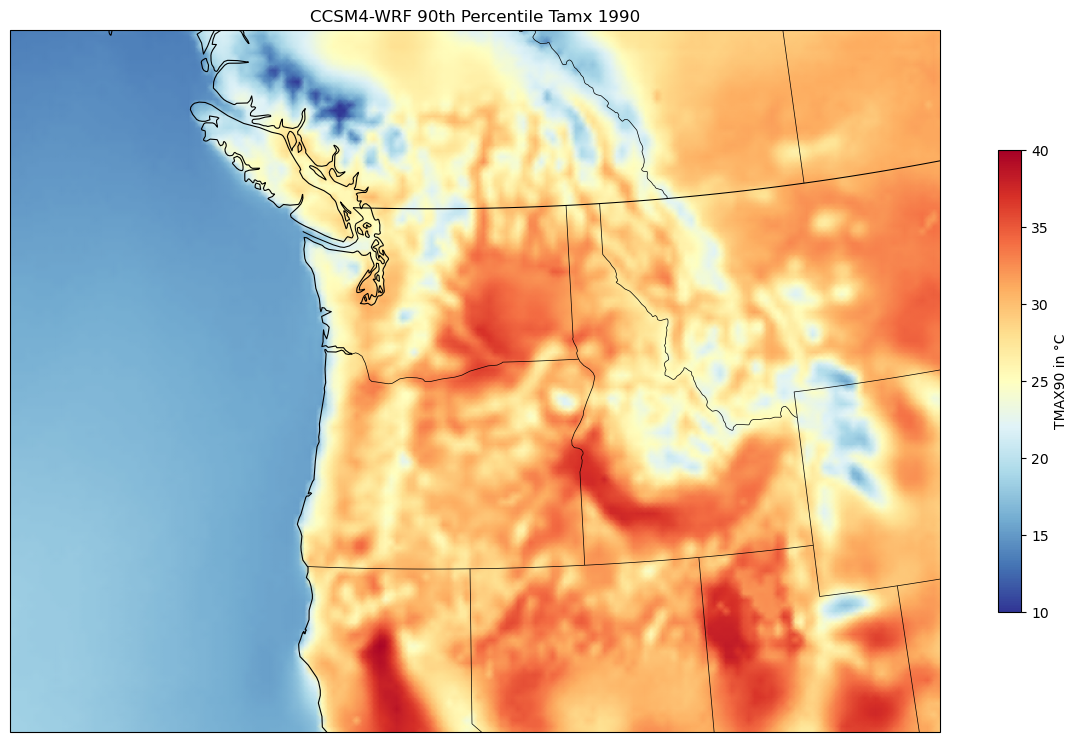

In [9]:
# Use function defined above to draw the map

figure(figsize=(15,10))
WRFplot(plotvar,lats,lons, Tmin,Tmax, "CCSM4-WRF 90th Percentile Tamx "+str(year), "TMAX90 in °C", "RdYlBu_r")
show()